## Health Data Reusability Project

This notebook is an informal investigation into the technologies needed to take the data contained in "open data" publications from the UK Department of Health. This will allow researchers to automate computations and respond more speedily to changes.

Even this published product has been subject to much revision and polishing to eliminate simple experiments and code written purely to understand certain aspects of various package's behavior.
My bad habit is to delete this code before it is committed to a source control system, but I would recommend that you inculcate better habits than me.
And, another thing I don't do enough: commit _[saves sources and checks into dev branch befre continuing].

Some of this is ugly, some of it will doubtless be unnecessary, but it shows at least some of the preliminary work that goes into getting one's thinking straightened out about a particular program or set of programs.
I have tried to resist the urge to return and “polish” the code, bit have reserved the right to retrospectively
revisit the narrative to augment its educational (and entertainment, for the two go hand in hand) value.

This notebook is also the basis of a 25-minute talk planned for PyData London on 4 August, 2015.

Steve Holden

### Acknowledgments

I am grateful to all contributors to the Python developer ecosystem and community.

The authors of and contributors to the [Pandas], [openpyxl], and [Jupyter] projects deserve
our undying thanks and continued support for the valuable tools they are creating to make science
more developmental and development more scientific.
I must also mention Fredrik Lund [the effbot], the forgotten hero who gave us PIL, now re-invigorated as Pillow.
It is still a delight to produce simple images with simple code.

I am grateful to the UK government, through its agents, for making the data available, and
would be delighted if this work allows them too to use the data more flexibly and to better
purpose.

In [1]:
import openpyxl as xl

Note that this software cannot read ".xls" files. `wb = xl.load_workbook("data/gpearnextime.xls")` raises an exception, so I toook the quick route and converted it to a ".xlsx" file with Excel before further processing.
Extending its capabilities would be useful, but would arguably be prolonging the life of a file format the UK
government should no longer be permitting.

One might investigate the older `xlrd` module, which can read ".xls" files (though sadly there appears
to be no easy way to write them out as ".xslx" files which I had hoped `xlwt` might have provided). It may also be possible to simply use `openpyxl` for `.xlsx` files or `xlrd` for `.xls` files, but that would require feasibility
studies and engineering work (though perhaps not too much).

Since this is an experimental project, I punted on this issue and manually performed a function that does not seem amenable to early automation. So sue me.

In [2]:
wb = xl.load_workbook("data/gpearnextime.xlsx")

/Users/sholden/Projects/HealthData/hd.env/lib/python3.4/site-packages/openpyxl/workbook/names/named_range.py:121: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


Ironically, during development I discovered that `Pandas` can (naturally) read Excel spreadheets, and
presumed I no longer needed `openpyxl`.
I later realized that because Pandas returns a `dict` of spreadsheets I needed `openpyxl` to determine
the ordering of the sheets

In [3]:
wb.sheetnames

['Contents',
 'Definitions and Changes',
 '1a. GPMS Cash Terms ',
 '1b. GPMS Real Terms',
 'Real terms working - HIDE',
 '1c. GMS',
 '1d. PMS',
 '2a. GPMS Expenses',
 '2b. GMS Expenses',
 '2c. PMS Expenses',
 '3a. GPMS by Age ',
 '3b. GPMS by Age ',
 '4a. GPMS by Rurality ',
 '4b. GPMS by Rurality ',
 '5a. GPMS by Practice Size',
 '5b. GPMS by Practice Size',
 '6a. GPMS by SHA_GOR',
 '6b. GPMS by SHA_GOR ',
 '7a. GPMS by NHS ER',
 '7b. GPMS by NHS ER',
 '8. GPMS Distribution',
 '9a. All Salaried',
 '9b. Salaried by Country ',
 '9c. Salaried by Age',
 '9d. Salaried by Rurality',
 '9e. Salaried by SHA_GOR',
 '9f. Salaried by NHS ER',
 '10. Salaried Distribution ',
 '11. Combined GPs']

In [4]:
ws = wb.get_sheet_by_name('1a. GPMS Cash Terms ')

In [5]:
ws["B7"].value

'All Practice Types'

In [6]:
for i in range(1, 200):
    print(ws["B{}".format(i)].value, ws["C{}".format(i)].value)

Return to contents None
None None
GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND None
None None
GPMS UK None
Practice Type Year
All Practice Types 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Non-Dispensing 2002/031,2
None 2003/041,2
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
None None
None None
GPMS ENGLAND None
Practice Type Year
All Practice Types 2002/03
None 2003/04
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/03
None 2003/04
None 2004/053
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/

__Observe__
that the date values and the footnote numbers run together to give a single string value.
That means some parsing has to be applied to separate it into a `(date, footnote)` pair, whose
second member will a list of notes that apply.
This is sensible from an analytical point of view, since then the year value can be used for
time-based analysis.
From an openness point of view it would be much better to have a separate column for the footnotes that should be applied to the row.
Then again, from an openness point of view it might be better not to use Excel spreadsheets 

Turns out that may not be as useful as I thought. It would probably be easier to maintain the column values as part ofthe processing logic. (_This was borne out when I wrote a non-terminating loop when experimenting with the code below you have Been Warned_)

In [7]:
ws["B3"].value

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

When I wrote this I knew it wasn't going to be a YAGNI because of the observations above.
Sometimes I'm happy to build bottom-up just to "get to grips" with one small aspect of a
problem - get a little hand-to-hand combat with the problem and notch up a small gain before
returning to the bigger picture.

In [8]:
def year_refs(s):
    """Separate the year string into the year plus the list of references"""
    return s[:7], s[7:].split(",")

In [9]:
year_refs("2009/101,3,4")

('2009/10', ['1', '3', '4'])

In [10]:
ws["d81"].value

'-'

In [11]:
def num_val(val):
    return 0 if val == "-" else val

In [12]:
num_val(32.456)

32.456

In [13]:
num_val("-")

0

In [14]:
3 == "banana"

False

In [15]:
cell = ws["B3"]

Probably a good idea to look at how we can find the relevant areas in a worksheet, then analyze the content of those areas (which will vary in size, increasing as the years go by, otherwise a static description of the shapes of
the sheet might have done.

In [16]:
ws["B3"].value # Sheet heading

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

In [17]:
ws["B5"].value # Table heading

'GPMS UK'

In [18]:
cells = ws.get_cell_collection()

In [19]:
from collections import defaultdict

cols_in_row = defaultdict(list)

for cell in cells:
    if cell.value is not None:
        cols_in_row[cell.row].append(cell.column)

In [20]:
max_row = max(c for c in sorted(cols_in_row.keys()))
max_row

198

Note that cell J43 has a spurious value that should really be ignored. Wonder how long that's been there and who knows it is? You can correct manually for that sort of stuff, but it's much better to try and think of a rule.

In [21]:
cols_in_row[43].remove('J')
cols_in_row[43]

['E', 'F', 'C', 'G', 'D', 'B']

## Initial Visualization

Since Python has some easy graphics, I wanted a quick and dirty way to get an idea, quite
literally, of the shape of the problem.

I did this by building a quick and dirty visual mapping of cells as pixels in a graphic.

In [22]:
pixels = [] # straight list of pixel values for graphic
matrix = []
#print("  ".join(list("ABCDEFG"))) # Column headings
for row_num in range(max_row):
    cols = cols_in_row[row_num]
    row_string = []
    row_matrix = []
    for col_name in "ABCDEFG":
        row_string.append("*" if col_name in cols else " ")
        row_matrix.append(col_name in cols)
    #print("  ".join(row_string))
    matrix.append(row_matrix)
    pixels += [1-p for p in row_matrix] + [1]*7 # add pixel row plus blank row

In [23]:
from PIL import Image
im = Image.new("1", (7, 198*2))

In [24]:
im.putdata(pixels)

Of course there's a lot of _hard-coded knowledge_ in this code, but it provides an initial glimpse as a single
worksheet.

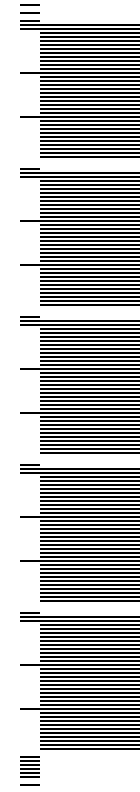

In [25]:
im.resize((7*20, 198*4))

This visualization makes the pattern of the tables more obvious.
Each begins with a row with a single cell, followed by two cells with six rows and a number of rows with five cells.
It would be possible to construct a vector with the number of cells in each row, and then search
that for patterns characteristic of the start of a table.
Whenever you find yourself thinking "pattern," though, it's worth considering using Python's `re`
regular expression-based pattern-matching algorithm (another effbot contribution).
Since no row has more than seven cells we can construct a ___string of row lengths___ and then
use pattern matching to find the starting positions of the tables.
The task then simplifies to finding the string `"1665"`.

In [26]:
str_sizes = "".join(str(sum(x for x in row)) for row in matrix) # only works for widths up to 9 ...

In [27]:
import re
for m in re.finditer("(1665)", str_sizes):
    print(m.span()[0])

5
42
79
116
153


Maybe there's some easier way to determing the shape without all these complex manipulations.
I don't know about you, but I often find my second approach to a problem is more intelligent
than the first (that's why we are often recommended to write a prototype _and then throw it away_).
So consider everything above as prototypical, offering insight into the necessary analysis but using a horribly inefficient algorithm.

In [28]:
len(ws.columns)

16

We can form the count of each column by summing the number of value-holding cells.

In [29]:
col_counts =[sum(cell.value is not None for cell in column) for column in ws.columns]

Next we eliminate _invalid_ columns (those with no more than one value in them -
this rule would eliminate the messy little tick mark in column "J").

In [30]:
valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
valid_cols

[1, 2, 3, 4, 5, 6]

In [31]:
row_counts =[sum(cell.value is not None for cell in row) for row in ws.rows]
valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
len(valid_rows)

185

In [32]:
ncols = len(valid_cols)
max_row_num = max(valid_rows)
pixels = []
row_counts = []
for row in range(max_row_num):
    cell_strings = []
    row_pixels = []
    for col in valid_cols: # use .extend on a generator expression?
        value = ws.rows[row][col].value
        row_pixels.append(value is None)
    pixels += row_pixels*3 + [1]*ncols # blank line
    row_counts.append(sum(1-pixel for pixel in row_pixels))

This new representation is "chunkier" - each cell is three rows of pixels, with only a
single blank row between cells.

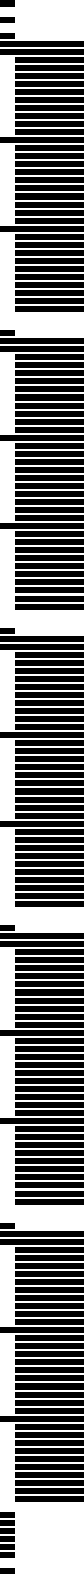

In [33]:
im = Image.new("1", (ncols, 4*(max_row_num)))
im.putdata(pixels)
im.resize((14*ncols, 8*(max_row_num+1)))

It appears that this techique can be fairly effective in getting idea of the shape of a worksheet.
The next step will be to turn that into a function with the worksheet as a parameter, and apply it to all the sheets on a workbook.

In [34]:
%matplotlib inline

In [35]:
def visualize(ws):
    col_counts =[sum(cell.value is not None for cell in column) for column in ws.columns]
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    row_counts =[sum(cell.value is not None for cell in row) for row in ws.rows]
    valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
    ncols = len(valid_cols)
    max_row_num = max(valid_rows)
    pixels = []
    row_counts = []
    for row in range(max_row_num):
        cell_strings = []
        row_pixels = []
        for col in valid_cols:
            value = ws.rows[row][col].value
            row_pixels.append(value is None)
        pixels += row_pixels*3 + [1]*ncols # blank line
        row_counts.append(sum(1-pixel for pixel in row_pixels))
    im = Image.new("1", (ncols, 4*(max_row_num)))
    im.putdata(pixels)
    return im.resize((14*ncols, 8*(max_row_num+1))), row_counts

In [36]:
images = []; row_counts = []
for ws in wb.worksheets:
    if ws.sheet_state != "hidden": # exclude hidden sheets
        image, counts = visualize(ws)
        images.append(image)
        row_counts.append(counts)

This gives us a list of worksheet images and a list of row-counts.
We compute the size of the image necessary to contain all of these
individual graphics, and create an image of that size.

In [37]:
LEFT_MARGIN = 4
im_width = sum(i.size[0] for i in images)+(len(images)-1)*LEFT_MARGIN
im_height = max(i.size[1] for i in images)
im_width, im_height

(3370, 2680)

In [38]:
len(row_counts)

28

In [39]:
table_widths = [max(c) for c in row_counts]

In [40]:
x_offset = 0
big_image = Image.new("1", (im_width, im_height), 1)
for i, im in enumerate(images):
    big_image.paste(im, (x_offset, 0))
    x_offset += im.size[0]+LEFT_MARGIN

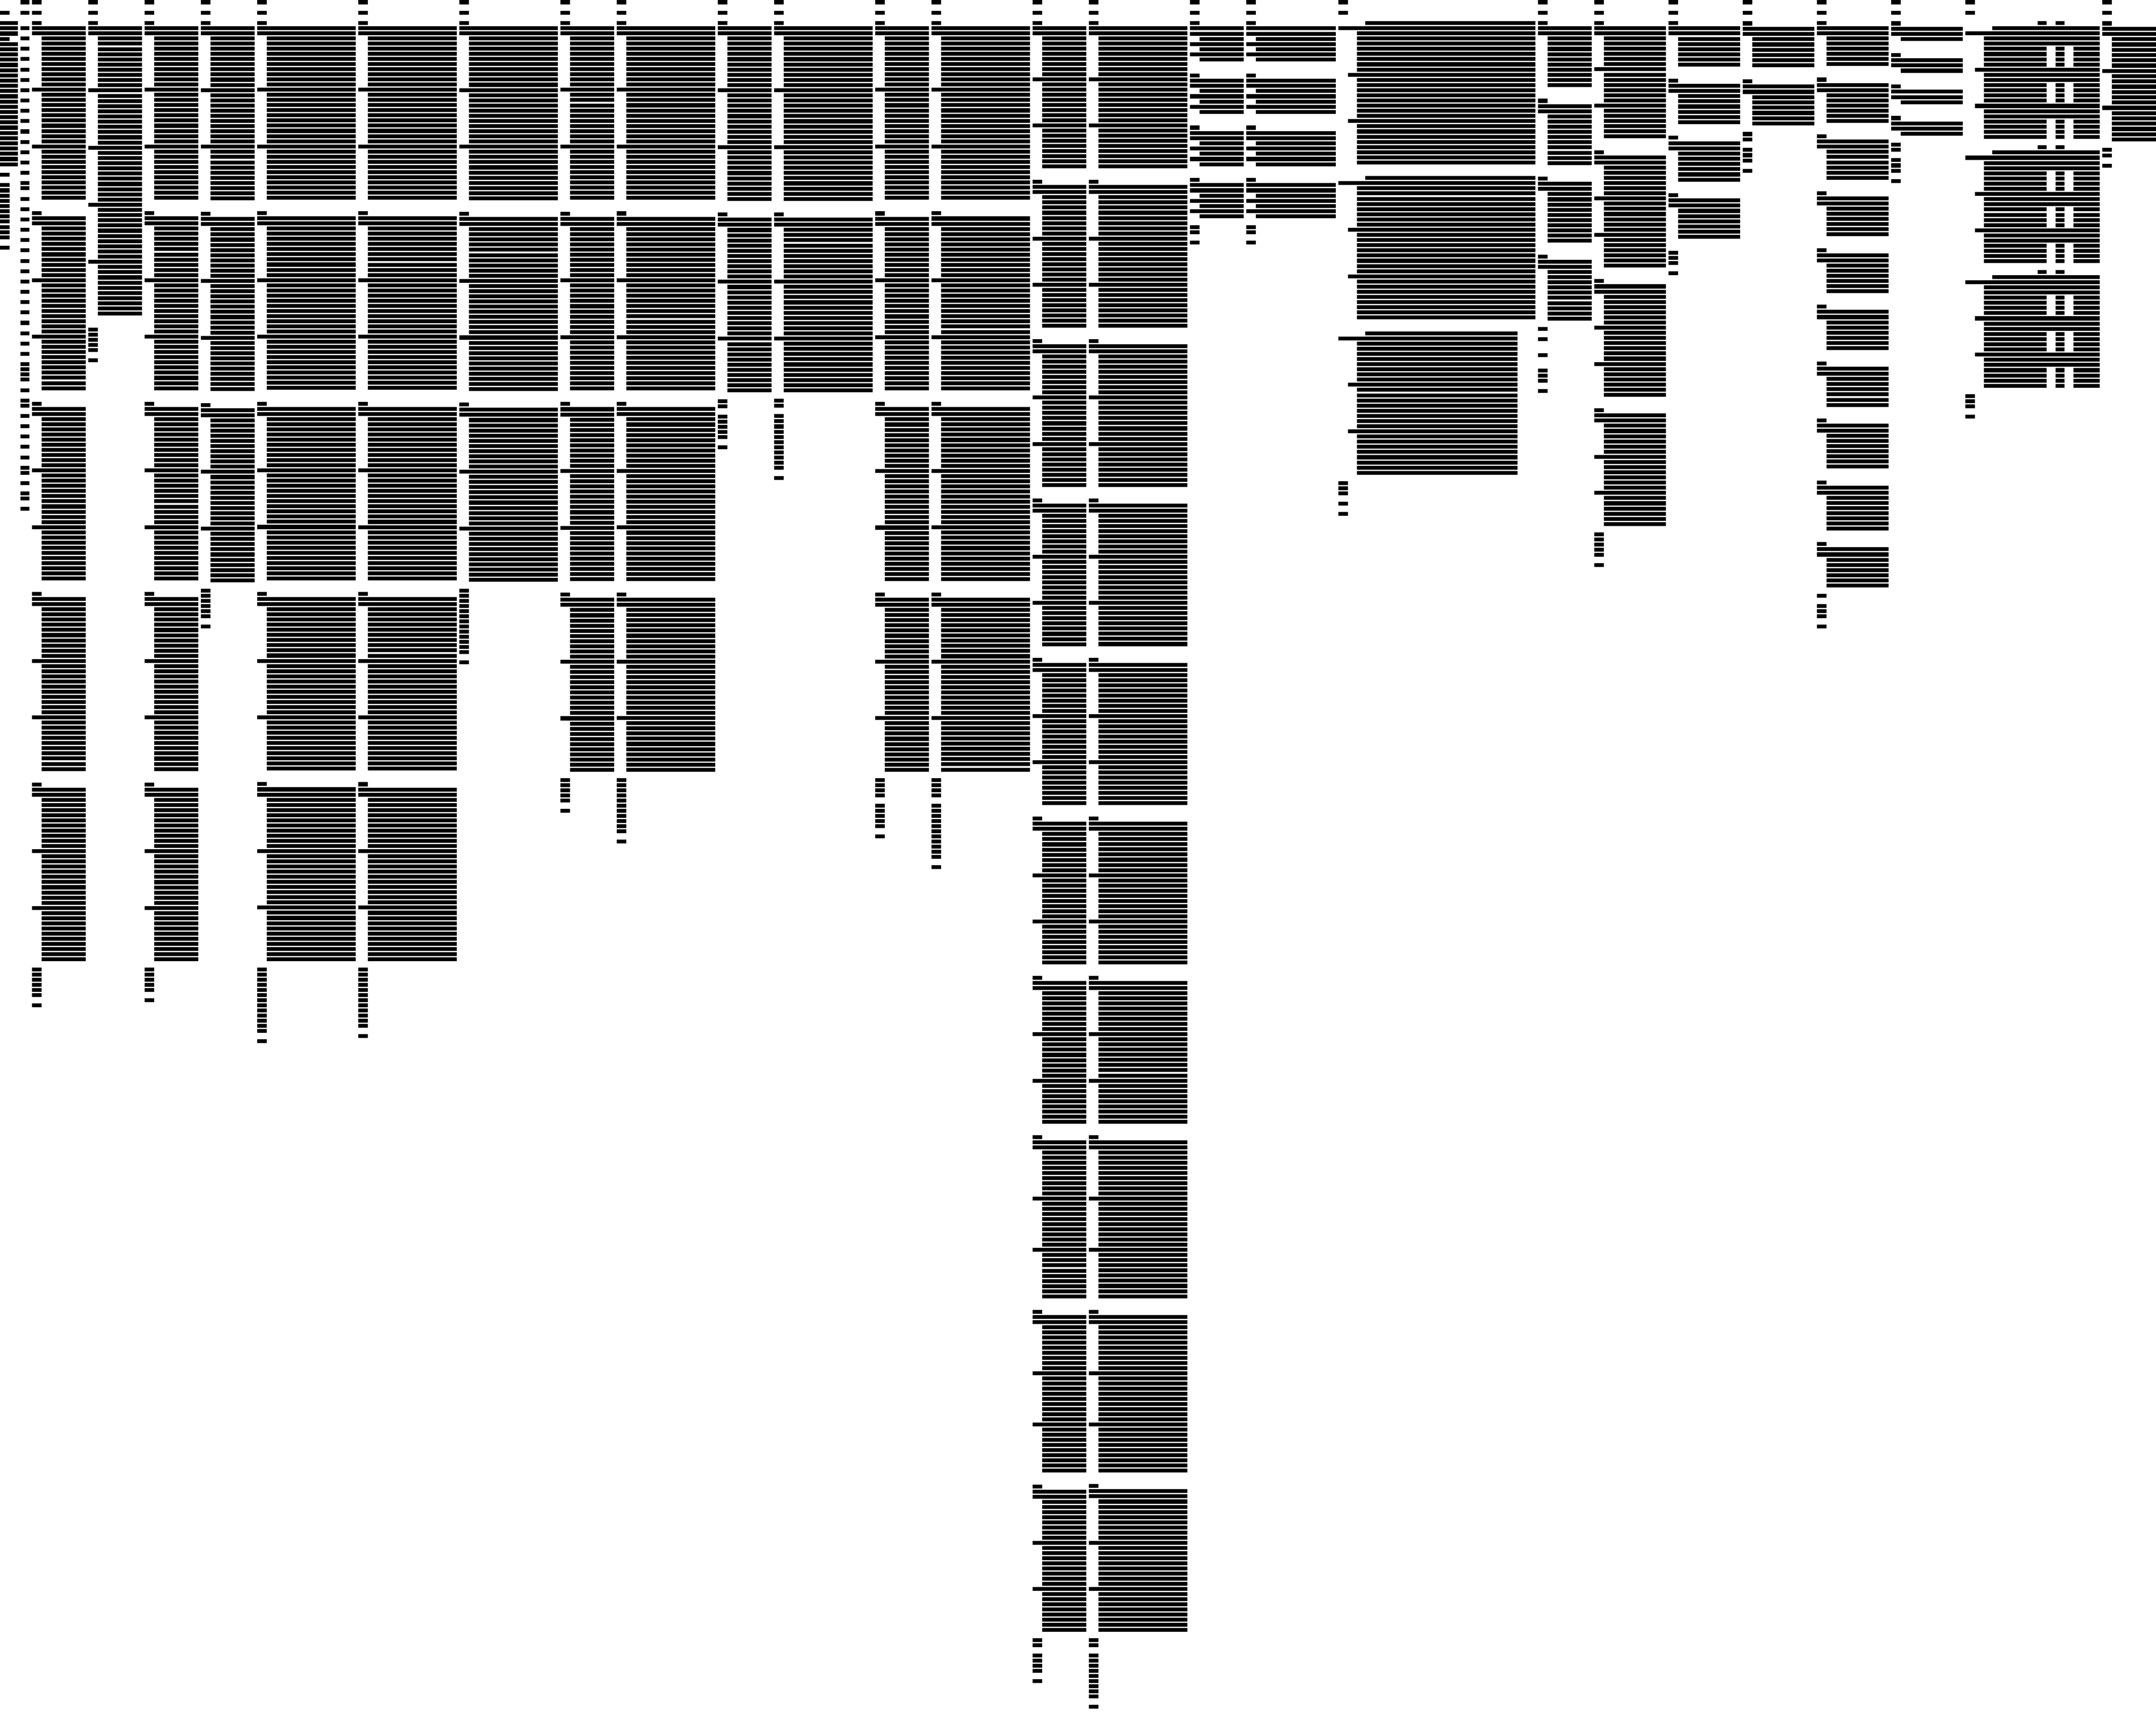

In [41]:
big_image

Note that in a live notebook (you may just be reading a PDF copy) the above graphic can be seen at full size and scrolled in two dimensions.
For presentation purposes the graphic is automatically scaled to the width of the notebook.

In [42]:
ws = wb.worksheets[2]
ws

<Worksheet "1a. GPMS Cash Terms ">

In [43]:
# Page header is in B3 always?
page_header = ws["B3"].value
print(page_header)

GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND


In [44]:
counts_string = "".join(str(n) for n in row_counts[2])
counts_string

'10101665555555555655555555556555555555500166555555555565555555555655555555550016655555555556555555555565555555555001665555555555655555555556555555555500166555555555565555555555655555555550111111010'

Looking for the pattern `"1665"`\* in `counts_string` finds a six-column table.
The first line is the name of the table.
The second line is the column headings.
The remainder of the table is a number of repeating groups.
The first column is special because unchanged values aren't repeated (which is why subsequent lines only have five elements).
While this is helpful for the human reader's comprehension it has to be corrected for the computer.

\* Yes, this is a fix - that string was chosen because I knew there were six columns in the tables.
We may or may not get to the computation of the number of columns later.

In [45]:
table_starts = [x.start(0) for x in re.finditer("1665", counts_string)]
table_starts

[4, 41, 78, 115, 152]

In [46]:
table_lens = [x.end("X")-x.start("X") for x in re.finditer("16(?P<X>65[56]+)", counts_string)]
table_lens

[33, 33, 33, 33, 33]

In [47]:
number_of_tables = len(table_starts)
number_of_tables

5

Let's learn how to access the elements we need in order to construct a usable data source.
The crucial facts for each table are the number of groups, the number of rows in each group
and the number of columns in the table.
When you think about it this is simply a description of a three-dimensional structure.
The first table reports figures over the whole UK.
The remainder analyze that information geographically, adding a fourth dimension to the data.

Let's do a little work on the first table to learn what we'll need to do in the general case.

Firstly, let's see how to access the various "chunks" of the table, beginning with its title.

In [48]:
start_row = table_starts[0]
table_len = table_lens[0]
ws["B5"].value, ws["B5"], ws.columns[1][4], ws.columns[1][start_row]

('GPMS UK',
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>)

In [49]:
title_cell = ws.columns[1][start_row]
title_cell.value

'GPMS UK'

Next we need to extract the column names, which are on the row following the title.

In [50]:
table_cols = 6
headers = [c.value for c in ws.rows[start_row+1][1:table_cols+1]]
# really should have computed that "6" from the pattern ...
headers

['Practice Type',
 'Year',
 'Estimated Population',
 'Gross Earnings',
 'Total Expenses',
 'Income Before Tax']

In [51]:
# This is a cheesy way to work out how many groups there are
pat = "(?P<X>(65+)+)"
m = re.search(pat, counts_string, start_row+2)
assert m.groups(0)[0].replace(m.groups(0)[1], "") == "" # only true for fixed groups

In [52]:
group_count = len(m.groups(0)[0])//len(m.groups(0)[1])
group_count

3

In [53]:
group_len = table_len//group_count
group_len

11

So we now seem to have enough information about the tables to be able to built
Pandas dataframes from them. Hooray!

In [54]:
import pandas as pd
first_data_row = start_row+2
dataframes = []
for data_start_row in range(first_data_row, first_data_row+table_len, group_len):
    group_cells = [[ws.rows[row][col].value for col in range(1, table_cols+1)]
                   for row in range(data_start_row, data_start_row+group_len)]
    group = pd.DataFrame(group_cells, columns=headers)
    group[headers[0]] = group[headers[0]][0]
    dataframes.append(group)

In [55]:
big_frame = pd.concat(dataframes)

In [56]:
big_frame.index = range(table_len)

In [57]:
big_frame

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362,184154,111439,72716
1,All Practice Types,2003/041,31594.98,203613.5,121594.8,82018.71
2,All Practice Types,2004/05,33887.99,230096.7,129926.2,100169.5
3,All Practice Types,2005/06,33874.98,245019.6,135016,110003.6
4,All Practice Types,2006/07,33887,247361.6,139694.4,107667.2
5,All Practice Types,2007/08,33622,251997.3,145925.4,106071.9
6,All Practice Types,2008/09,33371,258600,153300,105300
7,All Practice Types,2009/10,33050,262700,156900,105700
8,All Practice Types,2010/11,33000,266500,162400,104100
9,All Practice Types,2011/12,32950,267900,164900,103000


Here's a thing. I couldn't work out a quick way to do a linear interpolation
backwards in time here.
I'm sure somebody smarter can, if it's important.

In [58]:
import numpy as np
big_frame["Estimated Population"][22:33].replace("-", np.NaN).interpolate()

22         NaN
23         NaN
24    28558.76
25    28571.88
26    28599.00
27    28501.00
28    28461.00
29    28200.00
30    27950.00
31    27950.00
32    27900.00
Name: Estimated Population, dtype: float64

In [59]:
big_frame

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362,184154,111439,72716
1,All Practice Types,2003/041,31594.98,203613.5,121594.8,82018.71
2,All Practice Types,2004/05,33887.99,230096.7,129926.2,100169.5
3,All Practice Types,2005/06,33874.98,245019.6,135016,110003.6
4,All Practice Types,2006/07,33887,247361.6,139694.4,107667.2
5,All Practice Types,2007/08,33622,251997.3,145925.4,106071.9
6,All Practice Types,2008/09,33371,258600,153300,105300
7,All Practice Types,2009/10,33050,262700,156900,105700
8,All Practice Types,2010/11,33000,266500,162400,104100
9,All Practice Types,2011/12,32950,267900,164900,103000


A little excursion into JSON here: note that conversiopn to JSON doesn't necessarily
preserve the order of the columns.
Fortunately we have already extracted the desired order, so we can use the list of
headers to select the columns in the right order.

In [60]:
js = big_frame.to_json()

In [61]:
pd.read_json(js)[headers].sort()

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362,184154,111439,72716
1,All Practice Types,2003/041,31594.98,203613.5,121594.8,82018.71
2,All Practice Types,2004/05,33887.99,230096.7,129926.2,100169.5
3,All Practice Types,2005/06,33874.98,245019.6,135016,110003.6
4,All Practice Types,2006/07,33887,247361.6,139694.4,107667.2
5,All Practice Types,2007/08,33622,251997.3,145925.4,106071.9
6,All Practice Types,2008/09,33371,258600,153300,105300
7,All Practice Types,2009/10,33050,262700,156900,105700
8,All Practice Types,2010/11,33000,266500,162400,104100
9,All Practice Types,2011/12,32950,267900,164900,103000


Here I'm experimenting with replacing Nan values.
I'm not sure I use the `tf` frame again.

In [62]:
tf = pd.read_json(js)[headers].sort()[headers[2:]].replace("-", np.NaN) \
            -big_frame[headers[2:]] .replace("-", np.NaN)>1e-10

Given a list of the columns in a dataframe it's easy to select just the columns
you want to see.

In [63]:
big_frame[headers[2:]]

,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,31362,184154,111439,72716
1,31594.98,203613.5,121594.8,82018.71
2,33887.99,230096.7,129926.2,100169.5
3,33874.98,245019.6,135016,110003.6
4,33887,247361.6,139694.4,107667.2
5,33622,251997.3,145925.4,106071.9
6,33371,258600,153300,105300
7,33050,262700,156900,105700
8,33000,266500,162400,104100
9,32950,267900,164900,103000


## Table Extraction With `pandas`

#### Data Scientists may rejoin the excursion at this point

Having learned what was necessary to extract the tables, let's see if `pandas`
can't make it easier for us.

For a fully general solution using the pattern-matching approach outlined above,
we need to be able to cope with wider tables - so far the code just assumed that
none of the rows would be more than 9 cells long.
This is possible if we define functions to map between row lengths and
single-character strings.

In [64]:
rl_charset = "0123456789abcdefghijklmnopqrstuvwxyz"

def rl_dig(i):
    return rl_charset[i]

def dig_rl(c):
    return rl_charset.index(c)

# testing, even!
for c in rl_charset:
    assert rl_dig(dig_rl(c)) == c

for i in range(len(rl_charset)):
    assert dig_rl(rl_dig(i)) == i

In [65]:
def extract_tables(ws):
    import pandas as pd
    if ws.sheet_state == "hidden":
        return []
    col_counts = pd.Series([sum(cell.value is not None for cell in column) for column in ws.columns])
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    #print("valid columns:", valid_cols)
    row_counts =[sum(row[col_num].value is not None for col_num in valid_cols) for row in ws.rows]
    counts_string = "".join(rl_dig(n) for n in row_counts)
    valid_rows = [i for (i, ct) in enumerate(valid_cols) if ct > 0]
    #print("valid rows:", valid_rows)
    table_width = len(valid_cols)
    patchars = rl_dig(table_width), rl_dig(table_width), rl_dig(table_width-1)
    #print(title)
    #print(valid_rows, valid_cols)
    table_starts = [x.start(0) for x in re.finditer("1{}{}{}".format(*patchars), counts_string)] # assumes table_length known
    if not table_starts:
        return []
    tables = []
    for start_row in table_starts:
            pat_string = "1{}((?P<X>{}{}+)+)".format(*patchars)
            headers = [c.value for c in ws.rows[start_row+1][1:table_width+1]]
            title = ws.columns[1][start_row].value
            # Normalize indexing by creating a list-of-lists
            # representation of just the "interesting" cells
            sheet_cells = [[ws.rows[row][col] for col in valid_cols] for row in valid_rows]
            #print(pat_string, counts_string[start_row:])
            pat = re.compile(pat_string)
            m = pat.match(counts_string, start_row)
            table_len = len(m.groups(0)[0])
            group_len = len(m.groups(0)[1])
            group_count = table_len//group_len
            #print(title, pat_string, table_len, group_count, group_len)
            first_data_row = start_row+2
            groups = []
            #print("range:", first_data_row, first_data_row+table_len, group_len)
            for group_num in range(group_count):
                data_start_row = first_data_row+group_num*group_len
                #print("starting at:", data_start_row)
                #print("group len:", group_len)
                group_cells = [[c.value for c in ws.rows[row][1:table_width+1]]
                               for row in range(data_start_row, data_start_row+group_len)]
                group = pd.DataFrame(group_cells, columns=headers)
                group[headers[0]] = group[headers[0]][0]
                group.index = list(range(group_len))
                groups.append(group.replace("-", np.NaN))
            table = pd.concat(groups)
            table.index = (list(range(len(groups)*group_len)))
            tables.append(table)
    return tables

With the above function defined, we can create a list of lists of the
dataframes on each sheet.

In [66]:
table_sheets = [extract_tables(ws) for ws in wb.worksheets if ws.sheet_state != "hidden"]

In [67]:
lengths = [len(f) if f else None for f in table_sheets]
titles = [wb.sheetnames[i] for i, s in enumerate(wb.worksheets) if s.sheet_state != "hidden"]
print(sum(l for t, l in zip(titles, lengths) if l), "tables in all")

105 tables in all


In [68]:
no_tables = pd.DataFrame([], columns=["NO TABLES"])

Now we forms a list of the first table on each sheet
(substituting a little null table of our own if there aren't any).
In reading the code later I realised that I could shorten the formatting
code by not using an unpacking `for` loop and then starring the tuple to
pass it into the `.format()` method.
No biggy.

In [69]:
flist = [tables[0] if tables else no_tables for tables in table_sheets]
lenlist = [len(tables) for tables in table_sheets]
wlist = [f.shape[1] for f in flist]
from IPython.display import HTML
html = "".join("<h3>{}: {} tables, {} columns</h3><p>{}</p>".format(title, length, width, table.to_html())
               for (title, length, width, table) in zip(titles, lenlist, wlist, flist))

Sorry for the length of this output.
I decided to leave it fully expanded to make it relatively easy to check against
the spreadsheets.
It's easy to render HTML in a Jupyter notebook.

In [70]:
HTML(html)

This is where we check reading the worksheets in `pandas`.
This time we are going to do as much of the work as we can on dataframes.
A lot of this work was actually used to determine how to write the
`extract_tables()` function above, so it's really out of order.
Sometimes life just is that way - messy and refusing to fit into the
nice neat patterns we carry around in our head.

Basically I just refactored the code below making the worksheet a parameter
rather than a (module) global variable.

In [71]:
from pandas.io.excel import read_excel
pwb = read_excel("data/gpearnextime.xls", sheetname=None)

In [72]:
psheet = pwb['1a. GPMS Cash Terms ']

In [73]:
psheet.index = range(len(psheet)) # This may no longer be necessary

In [74]:
# Occasional random cells have odd characters in them
for name in list(psheet.columns.values):
     if psheet[name].count() <= 1:
        del psheet[name]

In [75]:
# Establish the limits of the tables
row_counts = list(psheet.count(axis=1).values)
endpos = len(row_counts)-1
while row_counts[endpos] < 2:
    endpos -= 1
startpos = 0
while startpos < endpos-1 and (row_counts[startpos] != 1 or row_counts[startpos+1] <= 1):
    startpos += 1

In [76]:
# We assume there is no table of three columns or less
row_counts = list(psheet.count(axis=1).values)
start_row_nums = []
for (i, val) in enumerate(row_counts[:-1]):
    if val==1:
        if row_counts[i+1] != row_counts[i+2]:
            continue
        else:
            if row_counts[i+1] > 3:
                start_row_nums.append(i)

In [77]:
tables = []
titles = []
extend = True
for start_row_num in start_row_nums:
    columns = list(psheet.iloc[start_row_num+1,:])
    titles.append(psheet.iloc[start_row_num, 0])
    end_row_num = start_row_num+1
    while row_counts[end_row_num] > 0:
        end_row_num += 1
    table = pd.DataFrame(psheet.iloc[start_row_num+2:end_row_num,:])
    table.index = range(end_row_num-start_row_num-2) # No title, no headers
    table.columns = columns
    table[headers[0]] = table[headers[0]].fillna(method="ffill")
    table.replace("-", np.NaN, inplace=True)
    if extend:
        table["Geography"] = titles[-1]
    tables.append(table)

In [78]:
btbl_len = 0
btbl_len = sum(len(table) for table in tables)
big_table = pd.concat(tables)
big_table.index = range(btbl_len)

The rest of the notebook is essentially me demonstrating my ineptitude with `pandas`.

In [79]:
big_table

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax,Geography
0,All Practice Types,2002/031,31362,184154.000000,111439.000000,72716.000000,GPMS UK
1,All Practice Types,2003/041,31594.98,203613.465384,121594.750565,82018.714819,GPMS UK
2,All Practice Types,2004/05,33887.99,230096.703402,129926.179861,100169.523542,GPMS UK
3,All Practice Types,2005/06,33874.98,245019.575577,135015.975718,110003.599860,GPMS UK
4,All Practice Types,2006/07,33887,247361.596509,139694.391103,107667.205405,GPMS UK
5,All Practice Types,2007/08,33622,251997.276539,145925.375805,106071.900735,GPMS UK
6,All Practice Types,2008/09,33371,258600.000000,153300.000000,105300.000000,GPMS UK
7,All Practice Types,2009/10,33050,262700.000000,156900.000000,105700.000000,GPMS UK
8,All Practice Types,2010/11,33000,266500.000000,162400.000000,104100.000000,GPMS UK
9,All Practice Types,2011/12,32950,267900.000000,164900.000000,103000.000000,GPMS UK


In [80]:
big_table.set_index(["Geography","Practice Type"])

Year Estimated Population  \
Geography             Practice Type                                         
GPMS UK               All Practice Types    2002/031                31362   
                      All Practice Types    2003/041             31594.98   
                      All Practice Types     2004/05             33887.99   
                      All Practice Types     2005/06             33874.98   
                      All Practice Types     2006/07                33887   
                      All Practice Types     2007/08                33622   
                      All Practice Types     2008/09                33371   
                      All Practice Types     2009/10                33050   
                      All Practice Types     2010/11                33000   
                      All Practice Types     2011/12                32950   
                      All Practice Types     2012/13                32850   
                      All Dispensing        2002/031                 4851   
                      All Dispensing        2003/041              5233.81   
                      All Dispensing         2004/05              5329.23   
                      All Dispensing         2005/06               5303.1   
                      All Dispensing         2006/07                 5288   
                      All Dispensing         2007/08                 5121   
                      All Dispensing         2008/09                 4910   
                      All Dispensing         2009/10                 4850   
                      All Dispensing         2010/11                 5050   
                      All Dispensing         2011/12                 5000   
                      All Dispensing         2012/13                 4900   
                      All Non-Dispensing  2002/031,2                  NaN   
                      All Non-Dispensing  2003/041,2                  NaN   
                      All Non-Dispensing     2004/05             28558.76   
                      All Non-Dispensing     2005/06             28571.88   
                      All Non-Dispensing     2006/07                28599   
                      All Non-Dispensing     2007/08                28501   
                      All Non-Dispensing     2008/09                28461   
                      All Non-Dispensing     2009/10                28200   
...                                              ...                  ...   
GPMS NORTHERN IRELAND All Practice Types     2005/06                 1053   
                      All Practice Types     2006/07                 1108   
                      All Practice Types     2007/08                 1123   
                      All Practice Types     2008/09                 1144   
                      All Practice Types     2009/10                 1100   
                      All Practice Types     2010/11                 1150   
                      All Practice Types     2011/12                 1150   
                      All Practice Types     2012/13                 1150   
                      All Dispensing         2002/03                   26   
                      All Dispensing         2003/04                   24   
                      All Dispensing         2004/05                   19   
                      All Dispensing         2005/06                  NaN   
                      All Dispensing         2006/07                  NaN   
                      All Dispensing         2007/08                  NaN   
                      All Dispensing         2008/09                   17   
                      All Dispensing         2009/10                  <25   
                      All Dispensing         2010/11                  <25   
                      All Dispensing         2011/12                  <25   
                      All Dispensing         2012/13                  <30   
                      All Non-Dispensing    

In [81]:
pt_geo = big_table.set_index(["Geography"])

In [82]:
pt_geo.index.values

array(['GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK',
       'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK',
       'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK',
       'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK',
       'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS UK',
       'GPMS UK', 'GPMS UK', 'GPMS UK', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND',
       'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS ENGLAND', 'GPMS SCOTL

In [83]:
pt_geo[pt_geo.index.values == 'GPMS NORTHERN IRELAND']

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
Geography,,,,,,
GPMS NORTHERN IRELAND,All Practice Types,2002/03,1067,128927.000000,68127.000000,60800.000000
GPMS NORTHERN IRELAND,All Practice Types,2003/04,1021,140243.169334,72679.445779,67563.723555
GPMS NORTHERN IRELAND,All Practice Types,2004/05,1045,173091.264561,81940.070172,91151.194388
GPMS NORTHERN IRELAND,All Practice Types,2005/06,1053,185204.976572,86548.770940,98656.205632
GPMS NORTHERN IRELAND,All Practice Types,2006/07,1108,181892.341164,88576.701661,93315.639504
GPMS NORTHERN IRELAND,All Practice Types,2007/08,1123,181029.451941,89973.789911,91055.662030
GPMS NORTHERN IRELAND,All Practice Types,2008/09,1144,183700.000000,94000.000000,89700.000000
GPMS NORTHERN IRELAND,All Practice Types,2009/10,1100,189200.000000,97800.000000,91400.000000
GPMS NORTHERN IRELAND,All Practice Types,2010/11,1150,185700.000000,97700.000000,88000.000000


This allows us to select the subset of the data referring to a specific geography.
In this particular case we can see that the "Estimated Population" column has some unusable values in it
(which have caused it to be interpreted as a string column).
Also the financials columns for some of the practice types are absent for some years.

In [84]:
big_table[big_table.Geography == 'GPMS NORTHERN IRELAND']

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax,Geography
132,All Practice Types,2002/03,1067,128927.000000,68127.000000,60800.000000,GPMS NORTHERN IRELAND
133,All Practice Types,2003/04,1021,140243.169334,72679.445779,67563.723555,GPMS NORTHERN IRELAND
134,All Practice Types,2004/05,1045,173091.264561,81940.070172,91151.194388,GPMS NORTHERN IRELAND
135,All Practice Types,2005/06,1053,185204.976572,86548.770940,98656.205632,GPMS NORTHERN IRELAND
136,All Practice Types,2006/07,1108,181892.341164,88576.701661,93315.639504,GPMS NORTHERN IRELAND
137,All Practice Types,2007/08,1123,181029.451941,89973.789911,91055.662030,GPMS NORTHERN IRELAND
138,All Practice Types,2008/09,1144,183700.000000,94000.000000,89700.000000,GPMS NORTHERN IRELAND
139,All Practice Types,2009/10,1100,189200.000000,97800.000000,91400.000000,GPMS NORTHERN IRELAND
140,All Practice Types,2010/11,1150,185700.000000,97700.000000,88000.000000,GPMS NORTHERN IRELAND
141,All Practice Types,2011/12,1150,192600.000000,99900.000000,92800.000000,GPMS NORTHERN IRELAND


Next we want to investigate the grouping, to allow us to summarize the data as we want.

In [85]:
big_table.groupby("Geography")

In [86]:
for x in big_table.groupby(["Geography", "Practice Type"]):
    t, df = x
    break
print(t)

('GPMS ENGLAND', 'All Dispensing')


In [87]:
df

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax,Geography
44,All Dispensing,2002/03,4281,274864.000000,186620.000000,88244.000000,GPMS ENGLAND
45,All Dispensing,2003/04,4621.276,290995.531436,192121.770137,98873.761299,GPMS ENGLAND
46,All Dispensing,2004/053,4695.8,NaN,202306.786358,NaN,GPMS ENGLAND
47,All Dispensing,2005/06,4637.35,340051.668298,210298.989183,129752.679116,GPMS ENGLAND
48,All Dispensing,2006/07,4668,337134.012421,207777.110482,129356.901938,GPMS ENGLAND
49,All Dispensing,2007/08,4528,345118.812137,217854.639523,127264.172614,GPMS ENGLAND
50,All Dispensing,2008/09,4302,354800.000000,231000.000000,123800.000000,GPMS ENGLAND
51,All Dispensing,2009/10,4250,356600.000000,232900.000000,123600.000000,GPMS ENGLAND
52,All Dispensing,2010/11,4400,365800.000000,245200.000000,120500.000000,GPMS ENGLAND
53,All Dispensing,2011/12,4400,367000.000000,249500.000000,117500.000000,GPMS ENGLAND


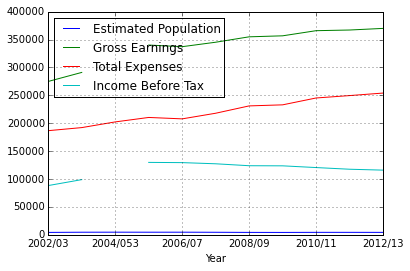

In [88]:
df.plot("Year")

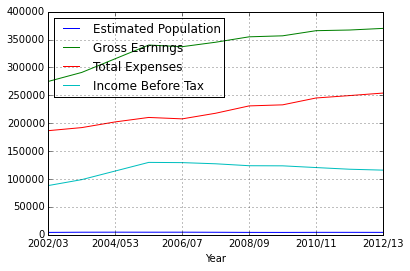

In [89]:
df.interpolate("linear").plot("Year")

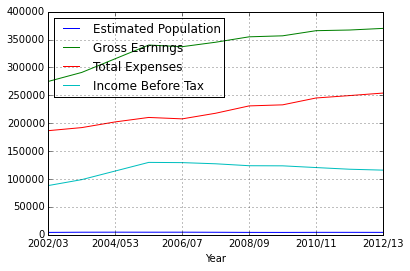

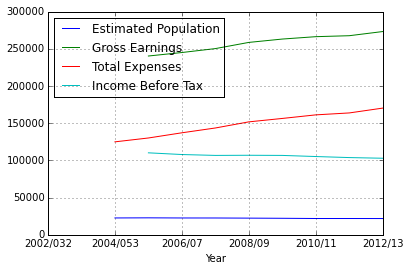

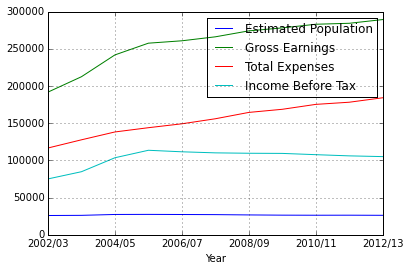

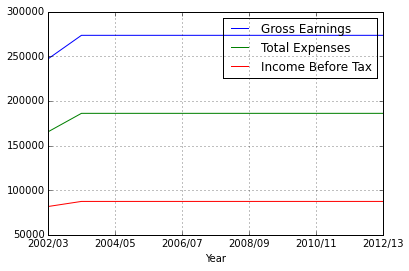

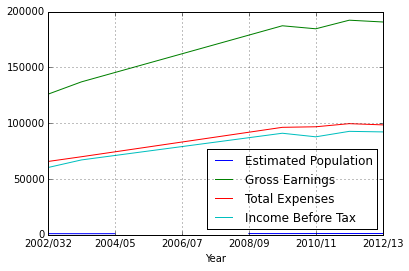

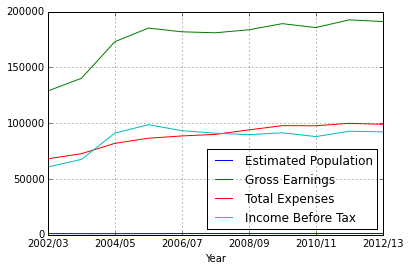

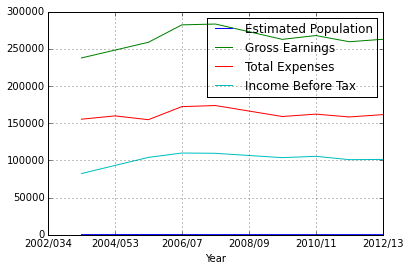

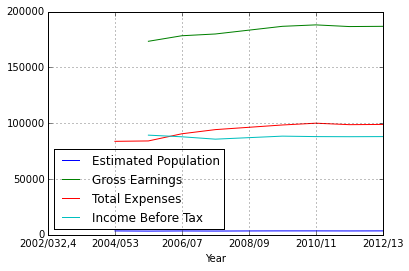

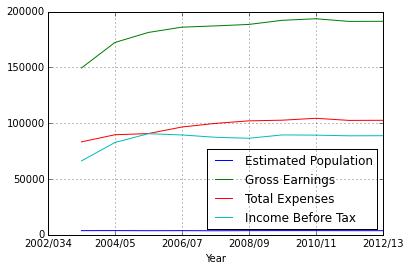

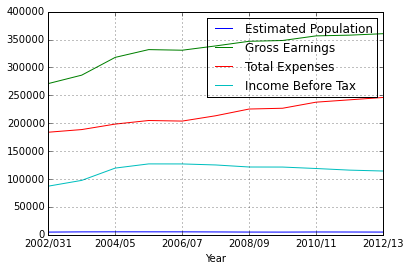

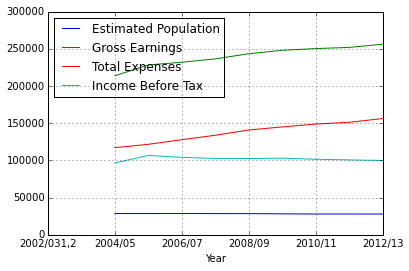

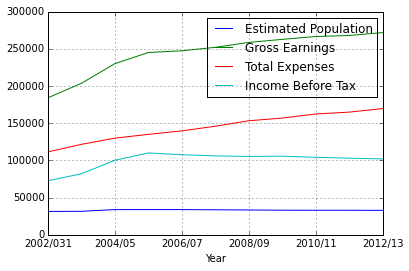

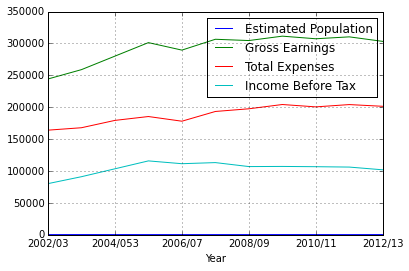

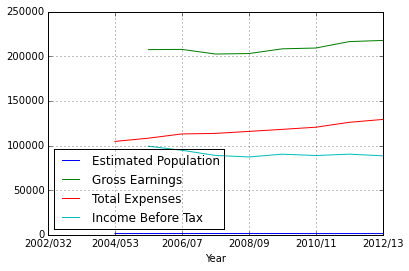

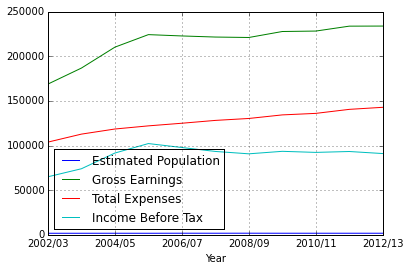

In [90]:
for x in big_table.groupby(["Geography", "Practice Type"]):
    t, df = x
    df.interpolate("linear").plot("Year")

In [91]:
for x in big_table.groupby(["Geography", "Practice Type"]):
    t, df = x
    print(df.Geography.iloc[0], df[["Practice Type"]].iloc[0], '\n', df.interpolate("linear").describe())

GPMS ENGLAND Practice Type    All Dispensing
Name: 44, dtype: object 
        Gross Earnings  Total Expenses  Income Before Tax
count       11.000000       11.000000          11.000000
mean    337980.693105   220870.845062      117191.339561
std      31648.137050    23222.702335       12986.420683
min     274864.000000   186620.000000       88244.000000
25%     326328.806144   205041.948420      115106.610104
50%     345118.812137   217854.639523      120500.000000
75%     361200.000000   239050.000000      125532.086307
max     369900.000000   254000.000000      129752.679116
GPMS ENGLAND Practice Type    All Non-Dispensing
Name: 55, dtype: object 
        Gross Earnings  Total Expenses  Income Before Tax
count        8.000000        9.000000           8.000000
mean    258047.864926   148804.889530      106284.892566
std      11711.481412    15770.762942        2307.909643
min     240310.005865   124940.226894      102900.000000
25%     248955.924349   137103.881392      104850.000000

In [93]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = big_table.groupby("Geography").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)

                       Total Expenses  Gross Earnings  Income Before Tax
Geography                                                               
GPMS ENGLAND                 £176,497        £286,411           £109,026
GPMS NORTHERN IRELAND         £97,603        £182,685            £85,093
GPMS SCOTLAND                £117,777        £209,117            £91,665
GPMS UK                      £167,879        £274,064           £106,185
GPMS WALES                   £145,794        £240,996            £94,954


In [94]:
pd.options.display.float_format = '{}'.format
ads[abs(ads["Income Before Tax"]+ads["Total Expenses"]-ads["Gross Earnings"])>500]

,Total Expenses,Gross Earnings,Income Before Tax
Geography,,,
GPMS ENGLAND,176497.29361467133,286411.16823118087,109026.02723799922


In [95]:
df[["Practice Type", "Income Before Tax"]]

,Practice Type,Income Before Tax
44,All Dispensing,88244.0
45,All Dispensing,98873.76129868152
46,All Dispensing,114313.2202071474
47,All Dispensing,129752.67911561328
48,All Dispensing,129356.90193823782
49,All Dispensing,127264.17261367393
50,All Dispensing,123800.0
51,All Dispensing,123600.0
52,All Dispensing,120500.0
53,All Dispensing,117500.0


In [96]:
for t, df in big_table.groupby(["Geography", "Practice Type"]):
    print(df[["Income Before Tax"]].mean())

Income Before Tax   117479.15149662066
dtype: float64
Income Before Tax   106284.89256620072
dtype: float64
Income Before Tax   103334.92130965138
dtype: float64
Income Before Tax   84529.4199404762
dtype: float64
Income Before Tax   81844.10959441036
dtype: float64
Income Before Tax   86967.49319174794
dtype: float64
Income Before Tax   102166.67902740766
dtype: float64
Income Before Tax   87874.84695061472
dtype: float64
Income Before Tax   85915.72958970108
dtype: float64
Income Before Tax   115944.54692605798
dtype: float64
Income Before Tax   101956.46199803938
dtype: float64
Income Before Tax   99886.0858509855
dtype: float64
Income Before Tax   104103.86840982756
dtype: float64
Income Before Tax   90991.06769333573
dtype: float64
Income Before Tax   89518.94390085731
dtype: float64


In [97]:
df[["Geography", "Year", "Income Before Tax"]]

,Geography,Year,Income Before Tax
99,GPMS WALES,2002/03,65007.0
100,GPMS WALES,2003/04,73982.78299825684
101,GPMS WALES,2004/05,91587.67622473872
102,GPMS WALES,2005/06,102193.888055053
103,GPMS WALES,2006/07,97771.53174280877
104,GPMS WALES,2007/08,93365.50388857306
105,GPMS WALES,2008/09,90700.0
106,GPMS WALES,2009/10,93500.0
107,GPMS WALES,2010/11,92300.0
108,GPMS WALES,2011/12,93300.0


In [98]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = big_table.groupby("Practice Type").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)

                    Total Expenses  Gross Earnings  Income Before Tax
Practice Type                                                        
All Dispensing            £197,391        £307,842           £109,210
All Non-Dispensing        £119,669        £215,651            £94,790
All Practice Types        £122,927        £216,176            £93,258


In [99]:
ads

,Total Expenses,Gross Earnings,Income Before Tax
Practice Type,,,
All Dispensing,"£197,391","£307,842","£109,210"
All Non-Dispensing,"£119,669","£215,651","£94,790"
All Practice Types,"£122,927","£216,176","£93,258"


In [100]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = big_table.groupby("Year").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)

            Total Expenses  Gross Earnings  Income Before Tax
Year                                                         
2002/03           £134,108        £209,288            £75,180
2002/031          £147,634        £227,578            £79,944
2002/031,2            £nan            £nan               £nan
2002/032           £65,700        £125,978            £60,278
2002/032,4            £nan            £nan               £nan
2002/034              £nan            £nan               £nan
2003/04           £137,227        £218,756            £81,529
2003/041          £155,094        £244,873            £89,779
2003/041,2            £nan            £nan               £nan
2003/042           £69,950        £137,037            £67,087
2004/05           £124,827        £222,745            £97,902
2004/053          £142,471            £nan               £nan
2005/06           £136,741        £244,218           £107,477
2006/07           £140,727        £246,268           £105,541
2007/08 

In [101]:
bt = big_table.copy()
bt["years"] = [year_refs(y)[0] for y in bt["Year"]]

In [102]:
bt["xrefs"] = [year_refs(y)[1] for y in bt["Year"]]

In [103]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = bt.groupby("years").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)

         Total Expenses  Gross Earnings  Income Before Tax
years                                                     
2002/03        £129,513        £204,096            £74,583
2003/04        £134,359        £216,075            £81,716
2004/05        £132,971        £222,745            £97,902
2005/06        £136,741        £244,218           £107,477
2006/07        £140,727        £246,268           £105,541
2007/08        £146,411        £250,040           £103,629
2008/09        £155,155        £257,918           £102,791
2009/10        £149,829        £251,600           £101,771
2010/11        £153,493        £253,786           £100,307
2011/12        £155,664        £255,657            £99,993
2012/13        £158,186        £257,021            £98,857


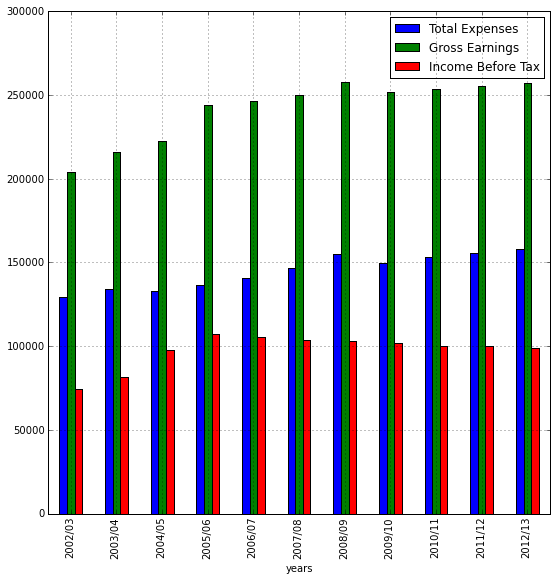

In [104]:
ads.plot(kind='bar', layout='stack', figsize=(9,9))

In [105]:
bt = bt[bt.Geography != "GPMS UK"]

In [106]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = bt.groupby("Geography").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)

                       Total Expenses  Gross Earnings  Income Before Tax
Geography                                                               
GPMS ENGLAND                 £176,497        £286,411           £109,026
GPMS NORTHERN IRELAND         £97,603        £182,685            £85,093
GPMS SCOTLAND                £117,777        £209,117            £91,665
GPMS WALES                   £145,794        £240,996            £94,954


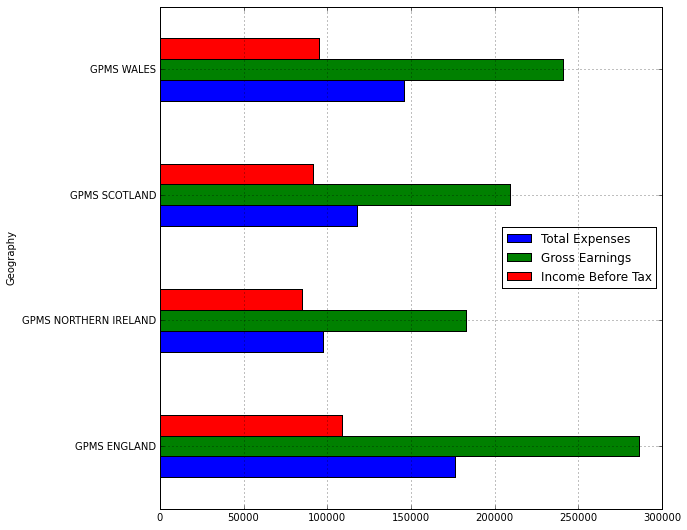

In [107]:
ads.plot(kind='barh', layout='stack', figsize=(9,9))

In [116]:
pd.options.display.float_format = '£{:,.0f}'.format
ads = bt.groupby("Year").agg({
        "Gross Earnings": np.mean,
        "Total Expenses": np.mean,
        "Income Before Tax": np.mean
    })
print(ads)
#ads.plot(kind='barh', layout='stack', figsize=(9,9))

            Total Expenses  Gross Earnings  Income Before Tax
Year                                                         
2002/03           £134,108        £209,288            £75,180
2002/032           £65,700        £125,978            £60,278
2002/032,4            £nan            £nan               £nan
2002/034              £nan            £nan               £nan
2003/04           £137,227        £218,756            £81,529
2003/042           £69,950        £137,037            £67,087
2004/05           £107,076        £199,352            £92,250
2004/053          £142,471            £nan               £nan
2005/06           £131,615        £236,960           £105,346
2006/07           £135,812        £239,140           £103,328
2007/08           £141,027        £242,356           £101,330
2008/09           £148,388        £248,538           £100,175
2009/10           £142,627        £242,136            £99,518
2010/11           £145,445        £243,609            £98,173
2011/12 

In [115]:
list((year_refs(dy) for dy in ads.index))

[('2002/03', ['']),
 ('2002/03', ['2']),
 ('2002/03', ['2', '4']),
 ('2002/03', ['4']),
 ('2003/04', ['']),
 ('2003/04', ['2']),
 ('2004/05', ['']),
 ('2004/05', ['3']),
 ('2005/06', ['']),
 ('2006/07', ['']),
 ('2007/08', ['']),
 ('2008/09', ['']),
 ('2009/10', ['']),
 ('2010/11', ['']),
 ('2011/12', ['']),
 ('2012/13', [''])]

In [120]:
list(zip(*(year_refs(dy) for dy in ads.index)))[0]

('2002/03',
 '2002/03',
 '2002/03',
 '2002/03',
 '2003/04',
 '2003/04',
 '2004/05',
 '2004/05',
 '2005/06',
 '2006/07',
 '2007/08',
 '2008/09',
 '2009/10',
 '2010/11',
 '2011/12',
 '2012/13')

In [121]:
list(zip(*(year_refs(dy) for dy in ads.index)))[1]

([''],
 ['2'],
 ['2', '4'],
 ['4'],
 [''],
 ['2'],
 [''],
 ['3'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''])

In [125]:
ads["Y"], ads["refs"] = list(zip(*(year_refs(dy) for dy in ads.index)))

In [126]:
ads

,Total Expenses,Gross Earnings,Income Before Tax,Y,refs
Year,,,,,
2002/03,"£134,108","£209,288","£75,180",2002/03,[]
2002/032,"£65,700","£125,978","£60,278",2002/03,[2]
"2002/032,4",£nan,£nan,£nan,2002/03,"[2, 4]"
2002/034,£nan,£nan,£nan,2002/03,[4]
2003/04,"£137,227","£218,756","£81,529",2003/04,[]
2003/042,"£69,950","£137,037","£67,087",2003/04,[2]
2004/05,"£107,076","£199,352","£92,250",2004/05,[]
2004/053,"£142,471",£nan,£nan,2004/05,[3]
2005/06,"£131,615","£236,960","£105,346",2005/06,[]


In [128]:
ids = ads.reset_index()
ids

,Year,Total Expenses,Gross Earnings,Income Before Tax,Y,refs
0,2002/03,"£134,108","£209,288","£75,180",2002/03,[]
1,2002/032,"£65,700","£125,978","£60,278",2002/03,[2]
2,"2002/032,4",£nan,£nan,£nan,2002/03,"[2, 4]"
3,2002/034,£nan,£nan,£nan,2002/03,[4]
4,2003/04,"£137,227","£218,756","£81,529",2003/04,[]
5,2003/042,"£69,950","£137,037","£67,087",2003/04,[2]
6,2004/05,"£107,076","£199,352","£92,250",2004/05,[]
7,2004/053,"£142,471",£nan,£nan,2004/05,[3]
8,2005/06,"£131,615","£236,960","£105,346",2005/06,[]
9,2006/07,"£135,812","£239,140","£103,328",2006/07,[]


In [129]:
ids["Y"], ids["refs"] = list(zip(*(year_refs(dy) for dy in ids.Year)))

In [130]:
ids

,Year,Total Expenses,Gross Earnings,Income Before Tax,Y,refs
0,2002/03,"£134,108","£209,288","£75,180",2002/03,[]
1,2002/032,"£65,700","£125,978","£60,278",2002/03,[2]
2,"2002/032,4",£nan,£nan,£nan,2002/03,"[2, 4]"
3,2002/034,£nan,£nan,£nan,2002/03,[4]
4,2003/04,"£137,227","£218,756","£81,529",2003/04,[]
5,2003/042,"£69,950","£137,037","£67,087",2003/04,[2]
6,2004/05,"£107,076","£199,352","£92,250",2004/05,[]
7,2004/053,"£142,471",£nan,£nan,2004/05,[3]
8,2005/06,"£131,615","£236,960","£105,346",2005/06,[]
9,2006/07,"£135,812","£239,140","£103,328",2006/07,[]
